In [16]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
from skimage import morphology
from skimage import draw

from skimage import io
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_dilation, binary_erosion, binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale
from skimage.draw import circle_perimeter

Pretty printing has been turned ON


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

C:\Users\USER\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


<function matplotlib.pyplot.show>

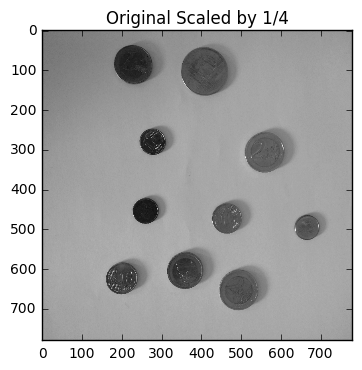

In [17]:
Path = './images/'
coins_im = io.imread(Path.__add__('coins.jpg'), as_grey=True)
coins_im = img_as_ubyte(coins_im)
coins_im = transform.rescale(coins_im, 1/4)
plt.figure()
plt.imshow(coins_im, cmap = cm.Greys_r)
plt.title('Original Scaled by 1/4')
plt.show

Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

<function matplotlib.pyplot.show>

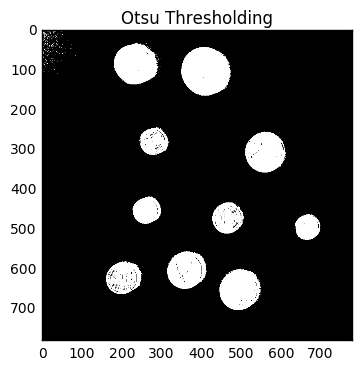

In [18]:
s = threshold_otsu(coins_im)
for i in range (np.shape(coins_im)[0]):
        for j in range (np.shape(coins_im)[1]):
            if coins_im[i][j] > s:
                coins_im[i][j] = 0
            else:
                coins_im[i][j] =1
plt.figure()
plt.imshow(coins_im, cmap = cm.Greys_r)
plt.title('Otsu Thresholding')
plt.show

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

<function matplotlib.pyplot.show>

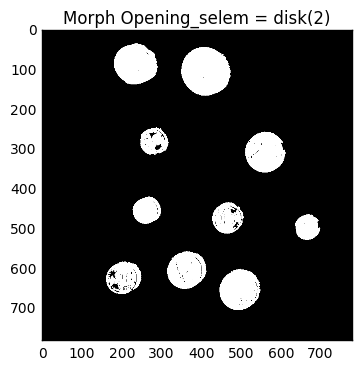

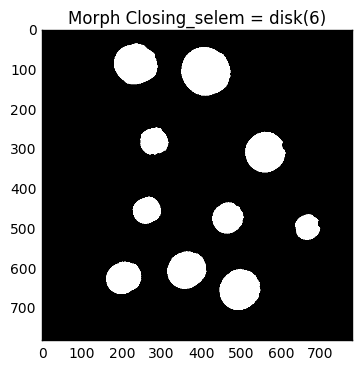

In [19]:
selem = disk(2)
coins_imM = morphology.binary_opening(coins_im, selem)
plt.figure()
plt.imshow(coins_imM, cmap = cm.Greys_r)
plt.title('Morph Opening_selem = disk(2)')
plt.show
selem = disk(6)
coins_imM = morphology.binary_closing(coins_imM, selem)
plt.figure()
plt.imshow(coins_imM, cmap = cm.Greys_r)
plt.title('Morph Closing_selem = disk(6)')
plt.show

Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

10 regions were found
radius 0: 52.669447102582495
radius 1: 61.330807307860006
radius 2: 34.70109939804905
radius 3: 50.468957877518065
radius 4: 34.58624802256939
radius 5: 38.92908126479519
radius 6: 31.529062379842163
radius 7: 47.9826573541666
radius 8: 42.408146115321024
radius 9: 51.12379558928607


C:\Users\USER\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


<function matplotlib.pyplot.show>

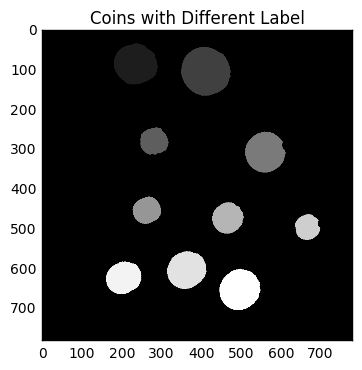

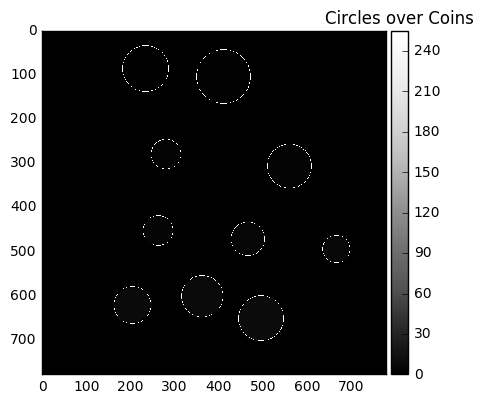

In [20]:
coins_imML, num = label(coins_imM, neighbors=4, background =0,return_num=True, connectivity=None)

print (str(num) + ' regions were found')
plt.figure()
plt.imshow(coins_imML, cmap = cm.Greys_r)
plt.title('Coins with Different Label')
plt.show

props = regionprops(coins_imML)

#coins_ = coins_imML  
for i in range (len(props)):
    #print (props[i].centroid[0])
    print ('radius ' + str(i) + ': ' + str(props[i].equivalent_diameter/2))
    circle_coord = circle_perimeter(int(props[i].centroid[0]), int(props[i].centroid[1]), int(props[i].equivalent_diameter/2))
    coins_imML[circle_coord[0], circle_coord[1]] = 255
    
plt.figure()
imshow(coins_imML, cmap = cm.Greys_r)
plt.title('Circles over Coins')
plt.show

## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

C:\Users\USER\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))




The number of markers: 6, and the number of glues:4


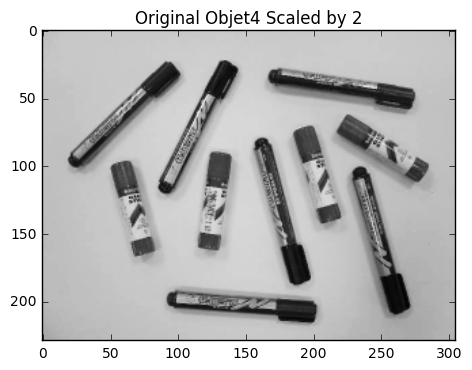

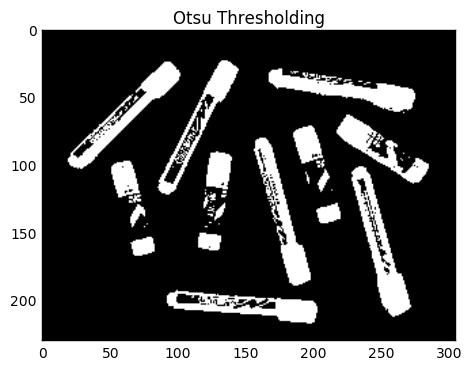

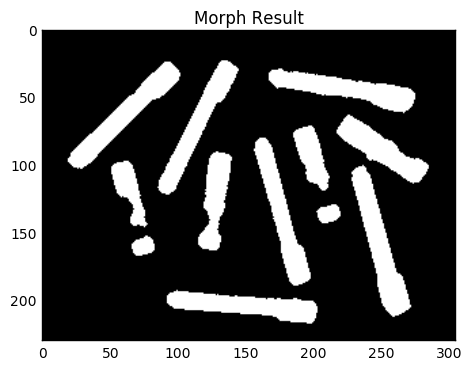

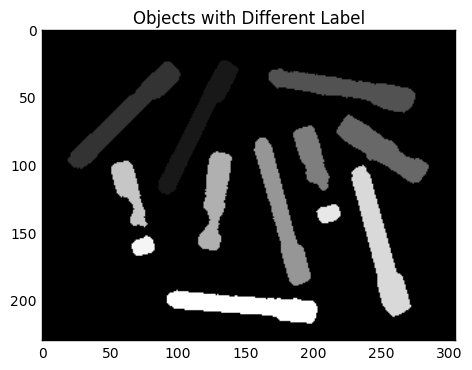

In [21]:
Path = './images/'
ob4_im = io.imread(Path.__add__('objets4.jpg'), as_grey=True)
ob4_im = img_as_ubyte(ob4_im)
ob4_im = transform.rescale(ob4_im, 1/2)
plt.figure()
plt.imshow(ob4_im, cmap = cm.Greys_r)
plt.title('Original Objet4 Scaled by 2')
plt.show

s = threshold_otsu(ob4_im)
for i in range (np.shape(ob4_im)[0]):
        for j in range (np.shape(ob4_im)[1]):
            if ob4_im[i][j] > s:
                ob4_im[i][j] = 0
            else:
                ob4_im[i][j] =1
plt.figure()
plt.imshow(ob4_im, cmap = cm.Greys_r)
plt.title('Otsu Thresholding')
plt.show

selem = disk(5)
ob4_imM = morphology.binary_closing(ob4_im, selem)

selem = disk(2)
ob4_imM = morphology.binary_opening(ob4_imM, selem)

plt.figure()
plt.imshow(ob4_imM, cmap = cm.Greys_r)
plt.title('Morph Result')
plt.show

ob4_imML, num = label(ob4_imM, neighbors=4, background =0,return_num=True, connectivity=None)
plt.figure()
plt.imshow(ob4_imML, cmap = cm.Greys_r)
plt.title('Objects with Different Label')
plt.show

props = regionprops(ob4_imML) 
count_mar = 0
count_glue = 0

#regionprops_area was used to differentiate differnt item. Markers (longer) have larger pixel count then that of glue
#Regions' areas below a threshold are considered neither the marker or the glue 
for i in range (len(props)):
    if props[i].area > 1300:
        count_mar = count_mar + 1
    elif props[i].area < 450:
        print ('')
    else:
        count_glue = count_glue +1
        
conclusion = 'The number of markers: ' + str(count_mar) + ', and the number of glues:' + str(count_glue)
print (conclusion)